# Using a pre-arranged simulation workflow
* Pre-arranged workflows are available which apply the steps above (and maybe more) automatically
* These workflow functions can automatically simulate turbines of different design in a single function call
* These workflows can also be instructed to distribute themselves across multiple CPUs

In [1]:
import reskit as rk
import pandas as pd

In [2]:
# Placment locations do not have to be put in as a pandas dataframe (a list of coordinates would also be okay), but
#  it is also the most flexible. Therefore, this manner is suggested

placements = pd.read_csv(rk.TEST_DATA["turbine_placements.csv"])

placements.head()

,capacity,hub_height,rotor_diam,lon,lat
0,4000,120,150,5.985195,50.797254
1,4000,120,130,5.994685,50.794208
2,4000,120,150,5.994107,50.800939
3,4000,120,130,6.004750,50.784432
4,4000,120,150,6.004174,50.791162


In [3]:
gen = rk.wind.onshore_wind_merra_ryberg2019_europe(
    placements=placements,
    merra_path=rk.TEST_DATA["merra-like"],  # path to MERRA2 data on your hard drive
    clc2012_path=rk.TEST_DATA[
        "clc-aachen_clipped.tif"
    ],  # Path to corine land cover (or anther land cover dataset) on your hard drive
    gwa_50m_path=rk.TEST_DATA[
        "gwa50-like.tif"
    ],  # Path to global wind atlas (at 50m, to match MERRA) on your hard drive
)

In [4]:
gen

<xarray.Dataset>
Dimensions:                  (location: 560, time: 71)
Coordinates:
  * location                 (location) int32 0 1 2 3 4 ... 555 556 557 558 559
  * time                     (time) datetime64[ns] 2015-01-01T00:30:00 ... 2015-01-03T22:30:00
Data variables:
    capacity                 (location) int64 4000 4000 4000 ... 4000 4000 4000
    hub_height               (location) int64 120 120 120 120 ... 120 120 120
    rotor_diam               (location) int64 150 130 150 130 ... 130 150 130
    lon                      (location) float64 5.985 5.995 ... 6.333 6.332
    lat                      (location) float64 50.8 50.79 50.8 ... 50.84 50.84
    powerCurve               (location) object 'SPC:226,25' ... 'SPC:301,25'
    roughness                (location) float64 0.05 0.05 0.05 ... 0.05 0.05
    elevated_wind_speed      (time, location) float64 4.905 5.191 ... 6.12 6.271
    surface_pressure         (time, location) float64 1.012e+05 ... 9.999e+04
    surface_air_temperature  (time, location) float64 -1.014 -1.044 ... -1.044
    capacity_factor          (time, location) float64 0.07082 0.05595 ... 0.1538

In [5]:
# Access raw data
gen["capacity_factor"].data

array([[0.07081904, 0.05594731, 0.09920235, ..., 0.03737832, 0.08215168,
        0.05429316],
       [0.0736652 , 0.05806051, 0.10280409, ..., 0.03611533, 0.07987275,
        0.05279549],
       [0.0716721 , 0.05625911, 0.10005704, ..., 0.03300928, 0.07394515,
        0.04870245],
       ...,
       [0.0245561 , 0.01926982, 0.03694155, ..., 0.01817204, 0.04254227,
        0.02603058],
       [0.04056087, 0.0319191 , 0.05966824, ..., 0.04011546, 0.08684046,
        0.05722029],
       [0.13567683, 0.11095435, 0.18399011, ..., 0.11358355, 0.21584595,
        0.15383052]])

In [6]:
# Recover as a dataframe
gen["capacity_factor"].to_dataframe().unstack(level=-1)

capacity_factor                                          \
location                        0         1         2         3         4     
time                                                                          
2015-01-01 00:30:00        0.070819  0.055947  0.099202  0.027920  0.077153   
2015-01-01 01:30:00        0.073665  0.058061  0.102804  0.028908  0.079628   
2015-01-01 02:30:00        0.071672  0.056259  0.100057  0.027754  0.077056   
2015-01-01 03:30:00        0.064835  0.050585  0.090846  0.024559  0.069495   
2015-01-01 04:30:00        0.079882  0.062732  0.110189  0.031315  0.085142   
...                             ...       ...       ...       ...       ...   
2015-01-03 18:30:00        0.019128  0.014435  0.028017  0.006080  0.021046   
2015-01-03 19:30:00        0.024462  0.019322  0.035705  0.009190  0.028887   
2015-01-03 20:30:00        0.024556  0.019270  0.036942  0.008682  0.028631   
2015-01-03 21:30:00        0.040561  0.031919  0.059668  0.014974  0.045867   
2015-01-03 22:30:00        0.135677  0.110954  0.183990  0.060290  0.148278   

                                                                       ...  \
location                  5         6         7         8         9    ...   
time                                                                   ...   
2015-01-01 00:30:00  0.060448  0.116187  0.064180  0.110102  0.062203  ...   
2015-01-01 01:30:00  0.062612  0.119475  0.066360  0.113106  0.064235  ...   
2015-01-01 02:30:00  0.060605  0.115754  0.064161  0.109403  0.062007  ...   
2015-01-01 03:30:00  0.054417  0.104961  0.057516  0.098854  0.055402  ...   
2015-01-01 04:30:00  0.067092  0.126277  0.070546  0.118832  0.067811  ...   
...                       ...       ...       ...       ...       ...  ...   
2015-01-03 18:30:00  0.015102  0.033757  0.015451  0.030043  0.014041  ...   
2015-01-03 19:30:00  0.020498  0.045713  0.021292  0.041576  0.019792  ...   
2015-01-03 20:30:00  0.021130  0.046673  0.022673  0.043730  0.021804  ...   
2015-01-03 21:30:00  0.035259  0.072826  0.038178  0.069543  0.037411  ...   
2015-01-03 22:30:00  0.119940  0.213792  0.127602  0.205623  0.125192  ...   

                                                                       \
location                  550       551       552       553       554   
time                                                                    
2015-01-01 00:30:00  0.105710  0.051157  0.103243  0.068157  0.078261   
2015-01-01 01:30:00  0.102815  0.049680  0.100797  0.066558  0.076032   
2015-01-01 02:30:00  0.095280  0.045655  0.093686  0.061623  0.070242   
2015-01-01 03:30:00  0.081491  0.038219  0.080001  0.051976  0.059572   
2015-01-01 04:30:00  0.092310  0.043946  0.090393  0.059169  0.067913   
...                       ...       ...       ...       ...       ...   
2015-01-03 18:30:00  0.006977  0.002032  0.005707  0.002806  0.003727   
2015-01-03 19:30:00  0.031963  0.011989  0.026811  0.014763  0.021134   
2015-01-03 20:30:00  0.055900  0.024019  0.051426  0.031265  0.040032   
2015-01-03 21:30:00  0.106381  0.051166  0.102622  0.067265  0.080761   
2015-01-03 22:30:00  0.257699  0.141944  0.251499  0.179237  0.204601   

                                                                       
location                  555       556       557       558       559  
time                                                                   
2015-01-01 00:30:00  0.074763  0.114590  0.037378  0.082152  0.054293  
2015-01-01 01:30:00  0.072770  0.111981  0.036115  0.079873  0.052795  
2015-01-01 02:30:00  0.067315  0.104370  0.033009  0.073945  0.048702  
2015-01-01 03:30:00  0.057030  0.089488  0.027433  0.062865  0.040923  
2015-01-01 04:30:00  0.064941  0.100775  0.031840  0.071510  0.046893  
...                       ...       ...       ...       ...       ...  
2015-01-03 18:30:00  0.003512  0.006176  0.001098  0.003633  0.001777  
2015-01-03 19:30:00  0.018874  0.029742  0.008785  0.021778  0.012069  
2015-

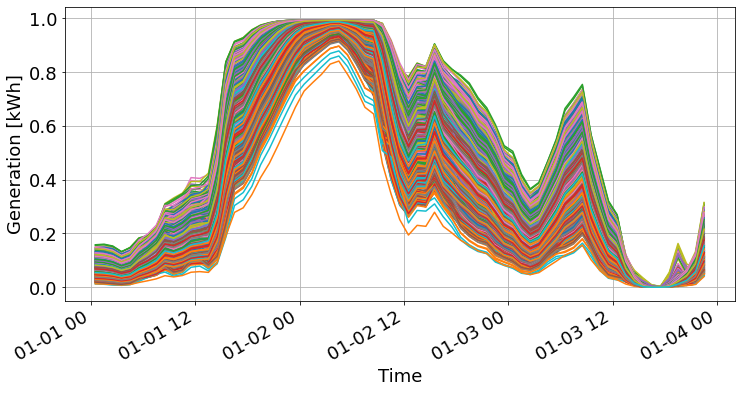

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("font", size=18)
df = gen["capacity_factor"].to_dataframe().unstack(level=-1)
df.plot(legend=False, figsize=(12, 6))
plt.ylabel("Generation [kWh]")
plt.xlabel("Time")
plt.grid()
plt.show()